# Breast Cancer Data Analysis and Prediction

#### Breast cancer is considered a dangerous disease due to its death rate. It is one of the diseases that could be cured if the disease is identified in the early stages, before it starts spreading across all the parts of the body. In this notebook we are attempting to create an accurate model, in the absence of which a medical professional may diagnose the disease incorrectly due to misinterpretation. We used the Wisconsin breast cancer dataset for our analysis. The dataset contains several feature dimensions extracted by fine needle aspiration and advanced imaging techniques. We employed several machine learning algorithms like logistic regression, linear discriminant analysis, quadratic discriminant analysis, kernel principal component analysis and neural networks. Neural networks gave us the highest accuracy of 98.6% with a precision of 98% and recall of 98%.

### Starting with Imports

In [1]:
# Importing standard libraries

import numpy as np #for numerical calculations
import pandas as pd #for working on dataframes

np.random.seed(42) #for generating same set of random numbers in multiple runs

import matplotlib.pyplot as plt # for plotting
import seaborn as sns #for nicer looking plots

#Scikit Learn library imports for Machine Learning algorithms and metrics
from sklearn.preprocessing import RobustScaler, StandardScaler # for scaling the data
from sklearn.model_selection import train_test_split #for splitting data into training data and testing data
from sklearn.ensemble.forest import RandomForestClassifier # for variable importance using random forests
from sklearn.model_selection import RandomizedSearchCV # for applying cross-validation on random forests
from sklearn.linear_model import LogisticRegression # for modelling using logistic regression
from sklearn.linear_model import LogisticRegressionCV # for applying cross-validation to Logistic regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #for modelling using LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis #for modelling using LDA

from sklearn.metrics import mean_squared_error, r2_score #for calculating MSE and Rsquare
from sklearn.metrics import confusion_matrix #for generating confusion matrix
from sklearn.metrics import classification_report #for generating classification report
from sklearn.metrics import roc_curve # for plotting the ROC curve
from sklearn.metrics import roc_auc_score # for scoring the ROC curve

# Keras and TensorFlow imports for Deep Learning
import keras
import tensorflow as tf

# Using keras with a Scikit-learn wrapper
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

# for defining the Neural-net
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

# For figure size,legend, fonts
%matplotlib inline
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

# For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


### Understanding the dataset

#### The very first step in data analysis, is to first understand the data we are dealing with. We should understand the size/shape of the data, number of obervations, number of predictors and the kind of response. This information helps us decide the nature of the problem and the approach that needs to be taken.

In [2]:
# Importing the breast cancer data in a pandas dataframe
data = pd.read_csv("data.csv")
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


#### Each row in the breast cancer dataset is an observation of a patient. Each column is a feature dimension of the nuclei extracted from the FNA. The diagosis column is categorical. The raw data tells us that there are 569 observations and 30 predictors. All the  predictors are continous and the reponse variable is categorical. This is a classification problem, where we should build a model for diagnosis as "Malignant" or "Benign". From the description, we can notice that the column 'id' does not add any value to the analysis since it has no predictive power. 'Unnamed: 32' column is full empty values NaN. We can clean up the data by removing 'id' and 'Unnames: 32' columns.

In [3]:
# Re-coding Benign as 0 and Malignant as 1

mapping = {'B': 0, 'M': 1}
data = data.replace({'diagnosis': mapping})
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Filtering out the columns which are not needed
data_subset = data.drop(["id","Unnamed: 32"], axis =1)
data_subset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Scaling the data

#### We begin our data analysis by scaling the data. If the data is not scaled, the algorithms only take magnitude into account without accounting for units. The predictors with larger magnitudes result in the largest weight. Standard scaler works best for symmetrical data, but robust scaler wil work best for skewed data with outliers. We scaled the data using both the methods and proceeded to analyze the histograms to prove the above statement.

In [5]:
# Assigning all the predictors to X and the response to y
X, y = data_subset.iloc[:,1:], data_subset["diagnosis"].astype("category")

# Scaling the data to remove skew
from sklearn.preprocessing import RobustScaler
scaler1 = RobustScaler()

X_scaled_robust = pd.DataFrame(scaler1.fit_transform(X), columns = data_subset.columns.values.tolist()[1:])
y_scaled_robust = y

from sklearn.preprocessing import RobustScaler
scaler2 = StandardScaler()
X_scaled_standard = pd.DataFrame(scaler2.fit_transform(X), columns = data_subset.columns.values.tolist()[1:])

In [6]:
# Tabulating kurtosis and skew of original and scaled data

kurtosis_skew_original=pd.DataFrame([X.kurtosis(),X.skew()]).transpose()
kurtosis_skew_robust=pd.DataFrame([X_scaled_robust.kurtosis(),X_scaled_robust.skew()]).transpose()
kurtosis_skew_standard=pd.DataFrame([X_scaled_standard.kurtosis(),X_scaled_standard.skew()]).transpose()

kurtosis_skew = pd.concat([kurtosis_skew_original,kurtosis_skew_robust,kurtosis_skew_standard],axis=1)
kurtosis_skew.columns=[['Original_Kurtosis',
                        'Original_skew',
                        'Robust_Kurtosis',
                        'Robust_Skew',
                        'Standard_Kurtosis',
                        'Standard_Skew']]

kurtosis_skew

,Original_Kurtosis,Original_skew,Robust_Kurtosis,Robust_Skew,Standard_Kurtosis,Standard_Skew
radius_mean,0.845522,0.942380,0.845522,0.942380,0.845522,0.942380
texture_mean,0.758319,0.650450,0.758319,0.650450,0.758319,0.650450
perimeter_mean,0.972214,0.990650,0.972214,0.990650,0.972214,0.990650
area_mean,3.652303,1.645732,3.652303,1.645732,3.652303,1.645732
smoothness_mean,0.855975,0.456324,0.855975,0.456324,0.855975,0.456324
compactness_mean,1.650130,1.190123,1.650130,1.190123,1.650130,1.190123
concavity_mean,1.998638,1.401180,1.998638,1.401180,1.998638,1.401180
concave points_mean,1.066556,1.171180,1.066556,1.171180,1.066556,1.171180
symmetry_mean,1.287933,0.725609,1.287933,0.725609,1.287933,0.725609
fractal_dimension_mean,3.005892,1.304489,3.005892,1.304489,3.005892,1.304489


#### Kurtosis and skew are tabulated for the original data, scaled data using standard scaler and robust scaler. Kurtosis is a measure of long tails in the distribution and skew is a measure of asymmetry in the distribution. We can see that the in the original data several parameters are skewed and have large kurtosis. After applying the standard and robust scalers, there is no change in the skew and kurtosis. The scaling will not change the shape of the distribution.

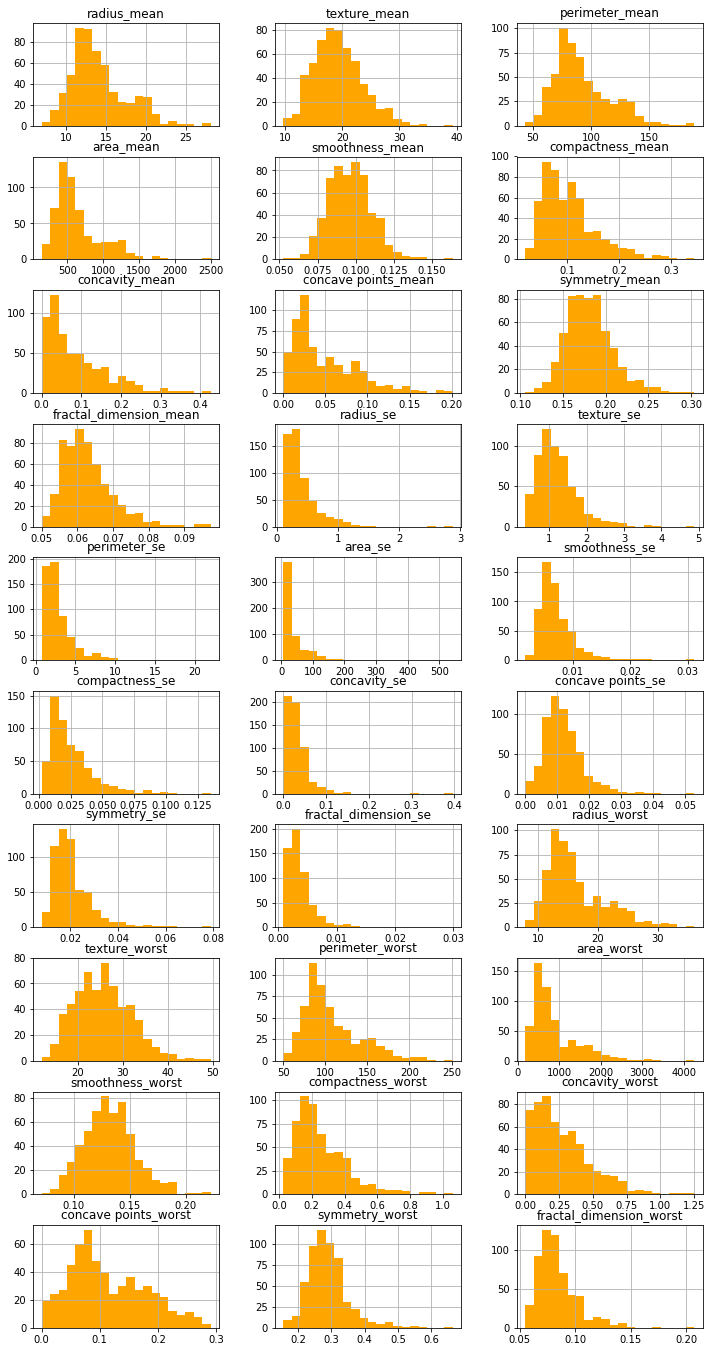

In [7]:
#plotting histograms of original data
fig, ax = plt.subplots(10,3, figsize=(12,24)) 
i = 0
for ax1 in ax:
    for ax2 in ax1:
        X.hist(column = X.columns[i], bins=20, ax=ax2, color = "orange")
        i = i + 1

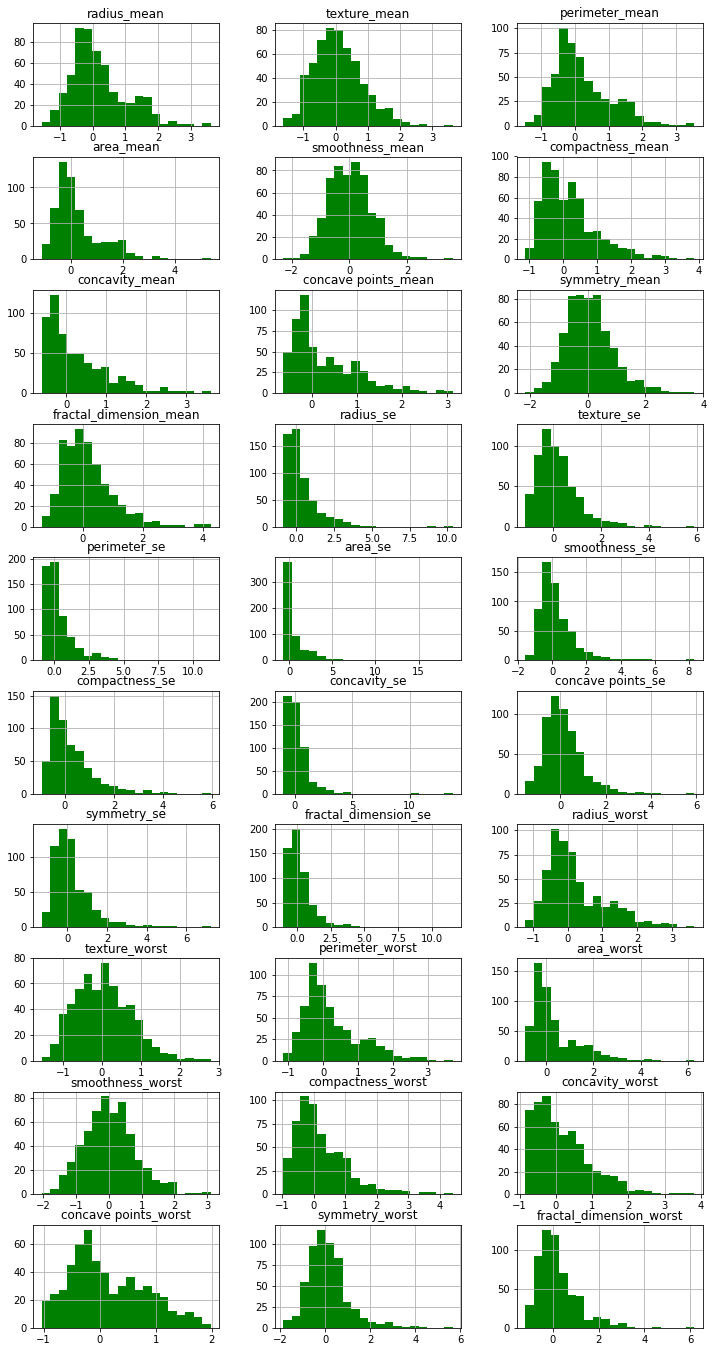

In [8]:
#plotting histograms of scaled data by Robust scalar
fig, ax = plt.subplots(10,3, figsize=(12,24)) 
i = 0
for ax1 in ax:
    for ax2 in ax1:
        X_scaled_robust.hist(column = X_scaled_robust.columns[i], bins = 20, ax = ax2, color = "green")
        i = i + 1

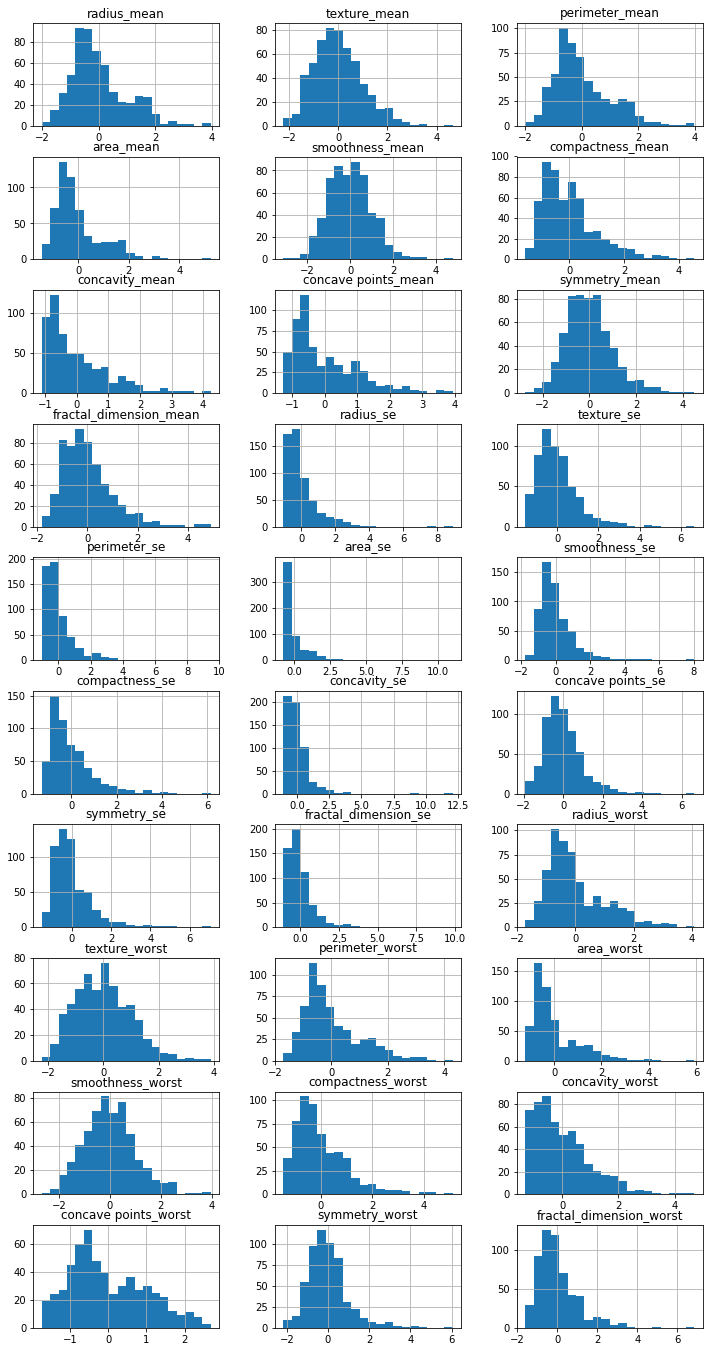

In [9]:
#plotting histograms of Standard scaled data

fig, ax = plt.subplots(10,3, figsize=(12,24)) 
i = 0
for ax1 in ax:
    for ax2 in ax1:
        X_scaled_standard.hist(column = X_scaled_standard.columns[i], bins=20, ax=ax2)
        i = i + 1

#### From the histograms, we can see that several factors are not normal. The mean parameters- area, concavity, concave points have high kurtosis and skew. Almost all the SE parameters are skewed. The worst parameters- area, compactness, concavity,symmetry, fractal_dimension have high kurtosis and skew. The standard and the robust scaling normalized the data to the same scale. We notice that robust scaling made the ditribution tighter compared to standard scaling. Robust scaling is expected to perform better than standard scaling in this situation.

# Variable Importance using Random Forest

#### Since the dataset has 30 predictors, it is important to understand which predictors have the most impact on the response. Variables/predictors with high importance will have a significant impact on the outcome. On the other hand, predictors with low importance can be omitted from the model making it simpler and faster to predict. We use random forests to identify the importance of the predictors.

In [10]:
# Importing the random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score

# Evaluating model's area under curve ROC
from sklearn.metrics import roc_curve, auc

In [11]:
# Splitting the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X_scaled_robust, y_scaled_robust, random_state=42)

# Using random forests for variable importance
rf = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 5)

# Creating a parameter distribution matrix and selecting the best estimators using randomized search and cross validation
param_dist = {"max_depth": range(1,30,5),
              "max_features": range(1,30,2),
              "bootstrap": [True, False],
              "criterion": ["gini","entropy"]}

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, scoring = "recall", cv = 10)

#### We split the scaled data into training and test data. For employing the random forests, we do a randomized search on the list of hyperparameters we initialized. The range of max_depth and max_features is based on the number of predictors. Tuning of the hyperparameters is based on the best recall score.

#### Why Recall?
#### Accuracy is defined as (True Positives + True Negatives) / (Total Observations) 
#### Recall is defined as (True Positives) / (True Positive + False Negative)
#### Precision is defined as (True Positives) / (True Positives + False Positives)
#### In the case of detecting the breast cancer, having cancer and not detecting it (False Negative) would be fatal compared to not having cancer and still diagnosed positive (False Positive). For this reason, the basis of selecting the best model is recall compared to accuracy or precion.

In [12]:
rf_cv.fit(X_train, y_train)

# Recall score

print(rf_cv.score(X_test, y_test))

y_pred = rf_cv.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9444444444444444
0.9553682896379525


#### The best recall score of the model is 0.944. 
#### The reciever operating characteristic curve is a plot of the true positives (Sensitivity) vs the false positives (Specificity). The maximum area under the ROC curve (roc_auc) varies from 0.95 to 0.97 with multiple runs. 

In [13]:
#Randomized search algorithm identifies the best condition among the matrix of parameters initialized

#We can also extract the feature importance using the identified best condition

best_pred_new = rf_cv.best_estimator_

best_pred_new

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features=25, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
feature_importances = pd.DataFrame(best_pred_new.feature_importances_ ,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
concave points_mean,0.318085
concave points_worst,0.283947
perimeter_worst,0.127789
area_worst,0.104635
radius_worst,0.064487
texture_worst,0.025399
texture_mean,0.016499
concavity_worst,0.011658
area_se,0.010141
area_mean,0.005718


Text(0, 0.5, 'Feature Importance')

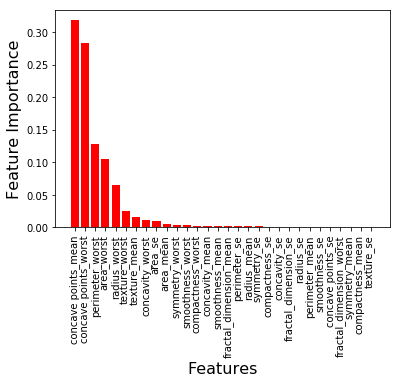

In [15]:
plt.bar(feature_importances.index, feature_importances.importance, color = "red")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.ylabel("Feature Importance")

#### From the table and the bar chart, we can see that the top ten important factors are perimeter_worst, concave points_worst, area_worst, concave points_mean, radius_worst, texture_worst, concavity_worst, texture_mean, area_se, concavity_mean. We can now proceed to use these ten factors for further analysis.

## Correlation Matrix

#### After identifying the most significant predictors we need to take a deeper look into the data. We will look at correlation plot to identify collinear predictors and scatter plots to see how the response is effected by pairwise relationship. 

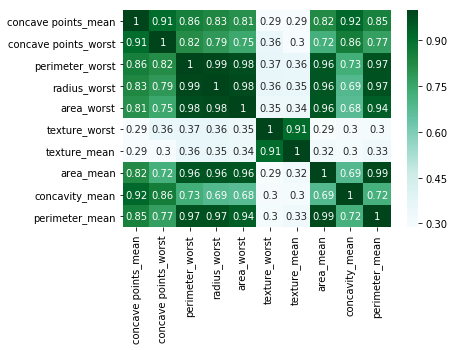

In [16]:
# Plotting the Correlation Matrix

data_concat = pd.concat([X_scaled_robust[["concave points_mean",
                                   "concave points_worst",
                                   "perimeter_worst",
                                   "radius_worst",
                                   "area_worst",
                                   "texture_worst",
                                   "texture_mean",
                                   "area_mean",
                                   "concavity_mean",
                                   "perimeter_mean"]], y], axis=1)

sns.heatmap(data_concat.corr(), cmap='BuGn', annot=True)

#### From the above correlation heatmap, we can observe that all the predictors have a strong correlation with the other predictors except texture_worst and texture_mean. This indicates high collinearity between the predictors.

## Pair-plot 

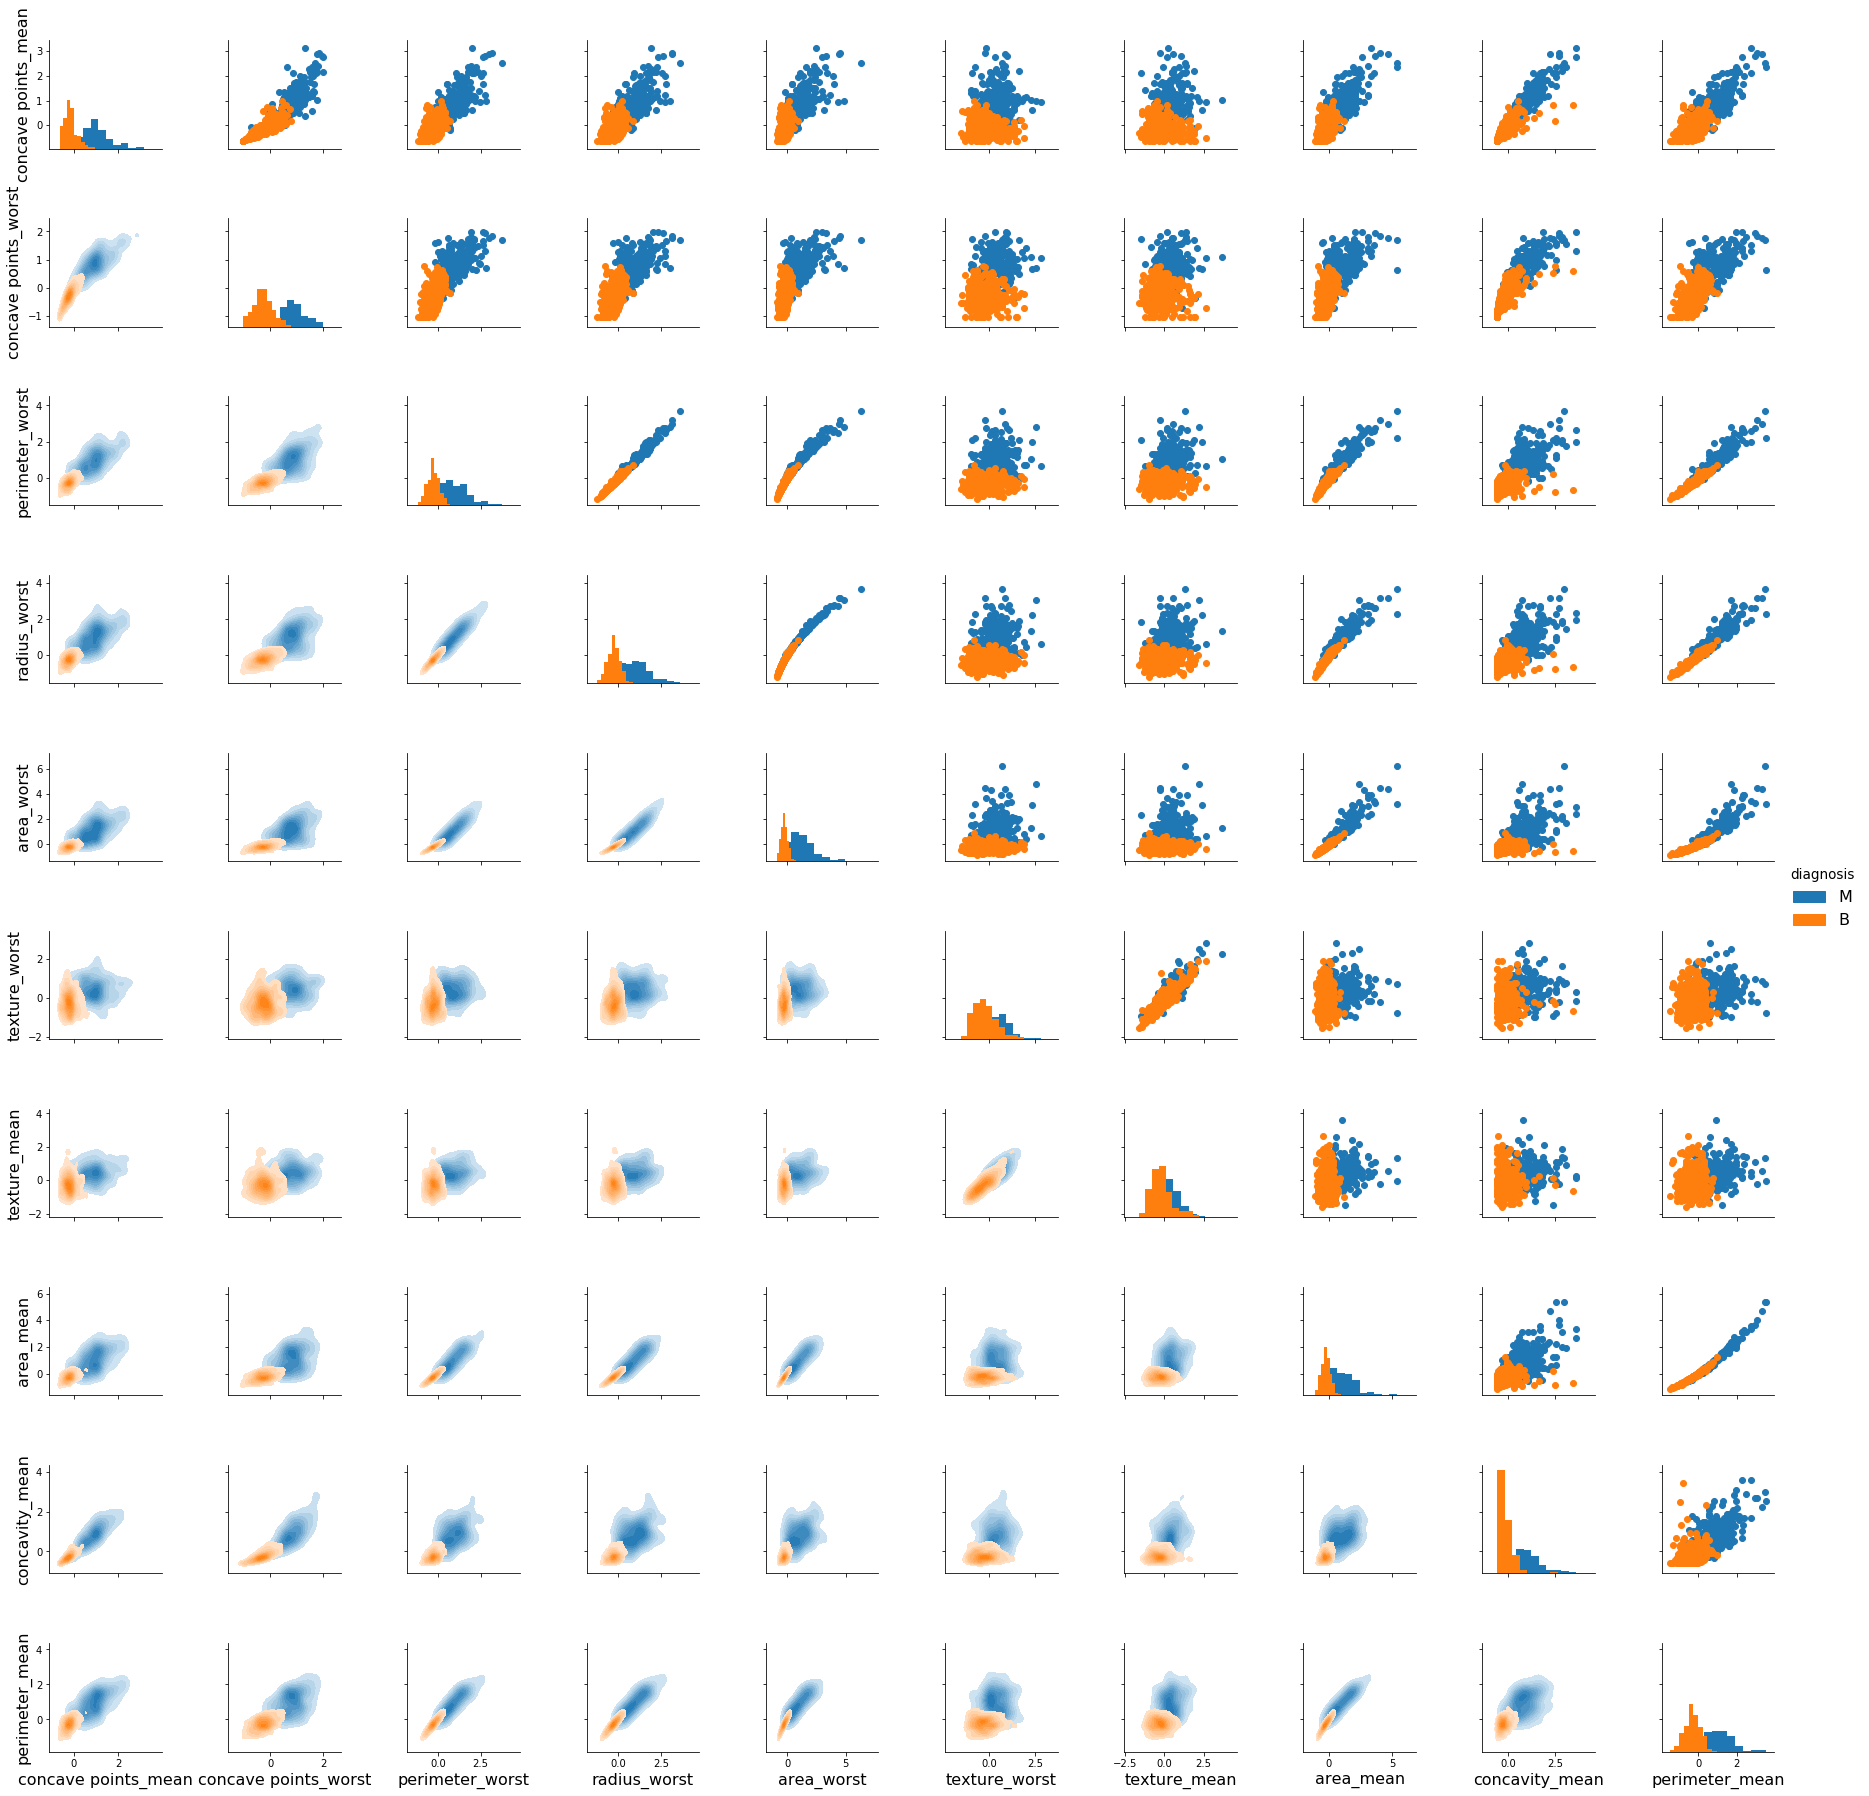

In [17]:
# Plotting the pair-wise plot

mapping = {0: 'B', 1: 'M'}
data_concat_pair = data_concat.replace({'diagnosis': mapping})

g = sns.PairGrid(data_concat_pair, hue="diagnosis")
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, shade = True, shade_lowest = False)
g = g.map_diag(plt.hist)
g = g.add_legend()

#### Looking at the pairwise plots, we can notice that for the top predictors, the distributions are bimodal. As suggested by the correlation matrix, the pairwise plot of texture_worst and perimeter_worst gives a very good separation of the data. We can also observe from the plots and deduce that larger the value of the predictors (except texture), more is probability of tumor being malignant.

## ZeroR

In [145]:
# Counting total number of observations in the dataset
total_observation = y_scaled_robust.count()

# Calculating the frequency of the majority class
Majority = y_scaled_robust.describe().freq

# Calculating the ZeroR score
zero_R = Majority/total_observation

print(zero_R)

0.6274165202108963


#### ZeroR is the baseline classifier which finds the majority class ie: the class to which the largest number of observation belong. This model essentially defines the baseline accuracy which we need to surpass in order to create an efeective model. With ZeroR on this dataset, we are able to acheive a score of 62.7% of tumor being benign. This means that there is a 63% chance of tumor being benign relative to 37% chance of a tumor being malignant.

# OneR

In [18]:
# Selecting top 10 most important features given by RandomForest Classifier
X, y = X_scaled_robust[["concave points_mean",
                        "concave points_worst",
                        "perimeter_worst",
                        "radius_worst",
                        "area_worst",
                        "texture_worst",
                        "texture_mean",
                        "area_mean",
                        "concavity_mean",
                        "perimeter_mean"]], y_scaled_robust.astype("category")

In [19]:
for column_name in X:
    from sklearn.metrics import confusion_matrix
    X1, y = data_concat[[column_name]], data_concat[["diagnosis"]].astype("category")
    X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=42)

    classifier = LogisticRegression(solver="newton-cg")
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    confusion_table = confusion_matrix(y_test, y_pred)
    
    print(f"OneR using: {column_name}")
    print(confusion_table)
    print(classification_report(y_test, y_pred))

    print("{:15}: {}".format("Classes", classifier.classes_))
    print("{:15}: {}".format("Coefficients", classifier.coef_))
    print("{:15}: {}\n".format("Intercept", classifier.intercept_))

OneR using: concave points_mean
[[80  9]
 [ 7 47]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        89
           1       0.84      0.87      0.85        54

   micro avg       0.89      0.89      0.89       143
   macro avg       0.88      0.88      0.88       143
weighted avg       0.89      0.89      0.89       143

Classes        : [0 1]
Coefficients   : [[4.62756604]]
Intercept      : [-1.83557601]

OneR using: concave points_worst
[[82  7]
 [ 5 49]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        89
           1       0.88      0.91      0.89        54

   micro avg       0.92      0.92      0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143

Classes        : [0 1]
Coefficients   : [[4.71225047]]
Intercept      : [-1.60283724]

OneR using: perimeter_worst
[[88  1]
 [ 5 49]]
              precisio

####  OneR is the next baseline classifier after the ZeroR. It takes each predictor one at a time and creates a model to predict the response. We take top 10 most important predictors given by random forest classifier and apply OneR using each of them. From the above results we can observe that both perimeter_worst and concave points_worst gives us the highest recall score of 91% individually and sets a new bar which we should exceed by the creating other complex classifiers

## Logistic Regression using 2 features (based on Recall)

#### From the correlation heat map and the OneR we can select the features which have the highest recall score, but not correlated to build a logistic regression model.  As observed, perimeter_worst has the highest recall score and is correlated with the other features which have high recall scores in OneR. Texture_worst and texture_mean have a recall score of 52% each and are correlated to each other but not with perimeter_worst. Hence we build a 2-predictor model with perimeter_worst and texture_worst.

In [20]:
X, y = X_scaled_robust[["perimeter_worst",
                        "texture_worst"]], y_scaled_robust

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

classifier = LogisticRegression(solver="newton-cg")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
confusion_table = confusion_matrix(y_test, y_pred)

predictions = classifier.predict_proba(X)[:, 1]
print(f"OneR using: {column_name}")
print(confusion_table)
print(classification_report(y_test, y_pred))

print("{:15}: {}".format("Classes", classifier.classes_))
print("{:15}: {}".format("Coefficients", classifier.coef_))
print("{:15}: {}\n".format("Intercept", classifier.intercept_))

OneR using: perimeter_mean
[[88  1]
 [ 3 51]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Classes        : [0 1]
Coefficients   : [[4.89672802 1.5871562 ]]
Intercept      : [-1.83085182]



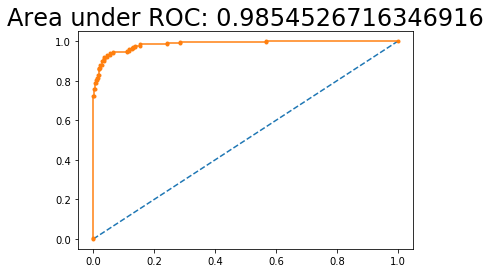

In [21]:
predictions = classifier.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, predictions)
auROC = roc_auc_score(y, predictions)
plt.plot([0,1], [0,1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")

plt.title("Area under ROC: {}".format(auROC), fontdict={"size":24})
plt.show()

#### We acheived a recall score of 94% and an ROC of 98.5% using perimeter_worst and texture_worst as the predictors for our logistic regression model. This model performs better than the 1R  of both perimeter_worst and concave points_worst which had a recall score of 91%.

intercept: [1.1535423], slope -3.0852212405993655


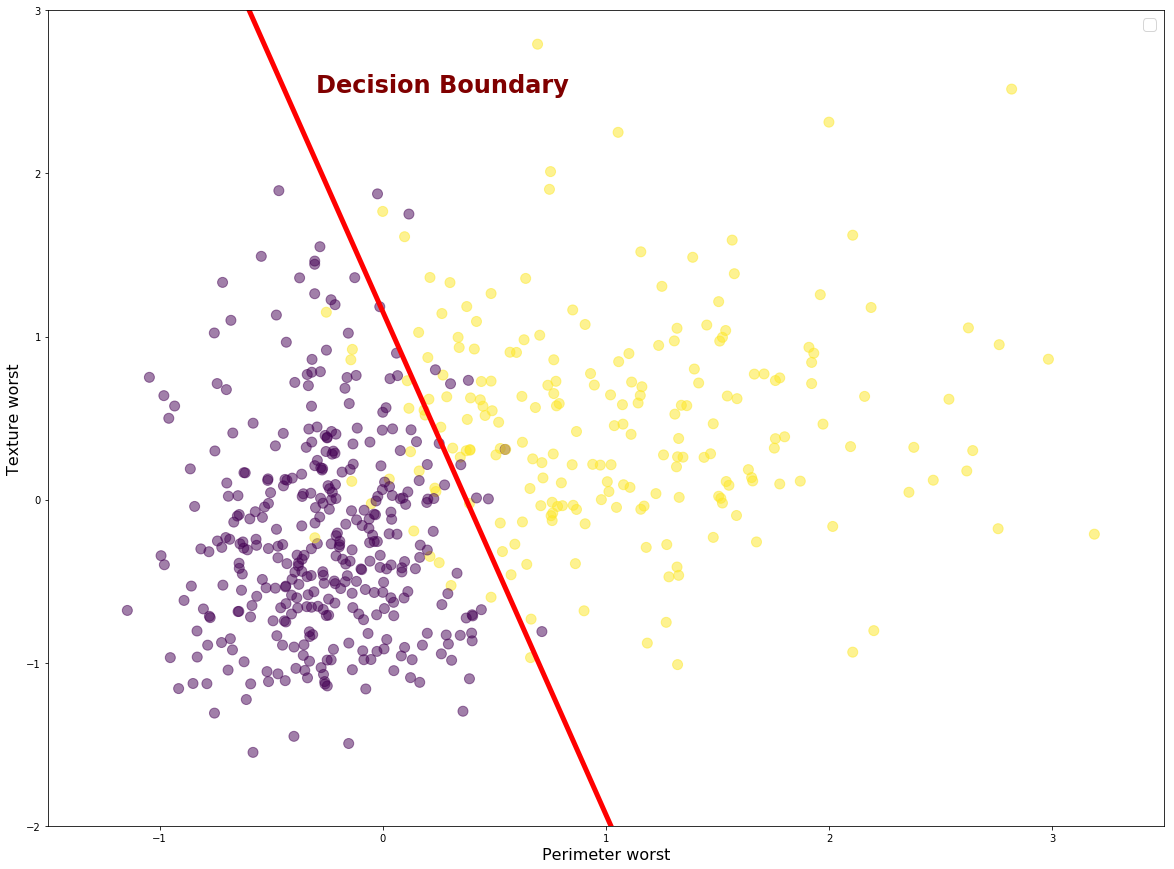

In [22]:
# Drawing the decision boundary over the points
xx = np.arange(-3,3,0.05)
beta0 = classifier.intercept_
beta1 = classifier.coef_[0][0]
beta2 = classifier.coef_[0][1]

# Decision boundary: beta0 + beta1*x + beta2*y = 0 
line_intercept = -beta0/beta2
line_slope = -beta1/beta2
print("intercept: %s, slope %s" % (line_intercept, line_slope))

# Equation of the line
yy = line_intercept + line_slope*xx

#Draw the scatterplot
figure, axes = plt.subplots(figsize=(20,15))
axes.scatter(X.perimeter_worst, X.texture_worst, 
            s=100, c=y, alpha=0.5)

axes.plot(xx, yy, lw=5, color="red")
axes.annotate('Decision Boundary', xy=(xx[50], yy[50]), xytext=(-0.3,2.5), fontsize=24, color='maroon', fontweight='bold')

axes.set(xlim=(-1.5,3.5), ylim=(-2,3), xlabel='Perimeter worst', ylabel='Texture worst')
axes.legend((y[y=='M'], y[y=='B']),('M','B'), loc='best')



#### The plot shows the decision boundary between malignant and benign using the 2-predictor logistioc regression model. As seen, the model does a good job of differentaiting between the two classes. 

## Logistic Regression with top 10 features given by Random Forest
### Based on Recall

In [23]:
X, y = X_scaled_robust[["concave points_mean",
                        "concave points_worst",
                        "perimeter_worst",
                        "radius_worst",
                        "area_worst",
                        "texture_worst",
                        "texture_mean",
                        "area_mean",
                        "concavity_mean",
                        "perimeter_mean"]],\
y_scaled_robust

In [24]:
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
from sklearn.metrics import confusion_matrix

classifier = LogisticRegression(solver="newton-cg")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)
print(classification_report(y_test, y_pred))

print("{:15}: {}".format("Classes", classifier.classes_))
print("{:15}: {}".format("Coefficients", classifier.coef_))
print("{:15}: {}".format("Intercept", classifier.intercept_))

[[88  1]
 [ 2 52]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.98      0.96      0.97        54

   micro avg       0.98      0.98      0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Classes        : [0 1]
Coefficients   : [[ 1.63030568  1.80398072  1.05602092  1.54320068  1.73834958  1.61703891
   0.32922374  0.14707478  0.51305764 -0.21031121]]
Intercept      : [-2.70456804]


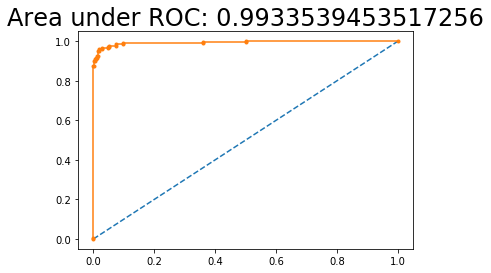

In [26]:
predictions = classifier.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, predictions)
auROC = roc_auc_score(y, predictions)
plt.plot([0,1], [0,1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")

plt.title("Area under ROC: {}".format(auROC), fontdict={"size":24})
plt.show()

#### The logistic regression model using the top 10 predictors from the random forests gave a recall score of 96% and an accuracy of 98%. This is the best recall score of all the models built so far. Even though the recall score improved only 2% from the 2-predictor to the 10-predictor model, the simplicity is worth sacrificing in this situation.

# Linear Discriminant Analysis with top 10 features given by Random Forest 
### Based on Recall

In [27]:
from sklearn.metrics import confusion_matrix

X, y = X_scaled_robust[["concave points_mean",
                        "concave points_worst",
                        "perimeter_worst",
                        "radius_worst",
                        "area_worst",
                        "texture_worst",
                        "texture_mean",
                        "area_mean",
                        "concavity_mean",
                        "perimeter_mean"]], y_scaled_robust

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)
print(classification_report(y_test, y_pred))

print("{:15}: {}".format("Classes", lda.classes_))
print("{:15}: {}".format("Coefficients", lda.coef_))
print("{:15}: {}".format("Intercept", lda.intercept_))

[[88  1]
 [ 3 51]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Classes        : [0 1]
Coefficients   : [[  4.0121478    2.2483388   -1.82869201  24.6032754  -13.25525742
    1.33833006   0.52112256   8.15787244   0.62271364 -14.62467815]]
Intercept      : [-3.65580445]


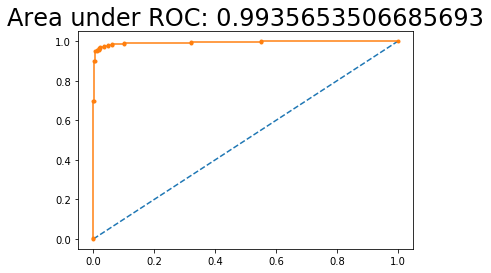

In [28]:
predictions = lda.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, predictions)
auROC = roc_auc_score(y, predictions)
plt.plot([0,1], [0,1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")

plt.title("Area under ROC: {}".format(auROC), fontdict={"size":24})
plt.show()

#### We can observe from the classification report of the 10-predictor LDA model, the recall score is 94%. The recall score is 2% lower than the 10-predictor logistic regression. Ideally LDA shines over the logistic regression when the classes are well seperated and when there are more than 2 classes. Since in our dataset, the feature distributions are close to each other with some overlap we observe better performance in our 10-predictor logistic regression model.

# Quadratic Discriminant Analysis with top 10 features given by Random Forest 
### Based on Recall

In [29]:
from sklearn.metrics import confusion_matrix

X, y = X_scaled_robust[["concave points_mean",
                        "concave points_worst",
                        "perimeter_worst",
                        "radius_worst",
                        "area_worst",
                        "texture_worst",
                        "texture_mean",
                        "area_mean",
                        "concavity_mean",
                        "perimeter_mean"]], y_scaled_robust

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred = qda.predict(X_test)
confusion_table = confusion_matrix(y_test, y_pred)

print(confusion_table)
print(classification_report(y_test, y_pred))

print("{:15}: {}".format("Classes", qda.classes_))

[[88  1]
 [ 3 51]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Classes        : [0 1]


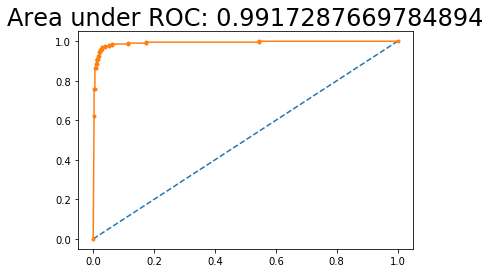

In [30]:
predictions = qda.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, predictions)
auROC = roc_auc_score(y, predictions)
plt.plot([0,1], [0,1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")

plt.title("Area under ROC: {}".format(auROC), fontdict={"size":24})
plt.show()

#### We can observe from the classification report, the 10-predictor QDA model is performing similar to the LDA model with a recall score is 94%.  Since in our dataset, the feature scatter plots do not suggest a curved decision boundary to separate the two classes, the QDA might be approximating the LDA model. 

# Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

X, y = X_scaled_robust[["concave points_mean",
                        "concave points_worst",
                        "perimeter_worst",
                        "radius_worst",
                        "area_worst",
                        "texture_worst",
                        "texture_mean",
                        "area_mean",
                        "concavity_mean",
                        "perimeter_mean"]], y_scaled_robust

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
confusion_table = confusion_matrix(y_test, y_pred)

print(confusion_table)
print(classification_report(y_test, y_pred))

print("{:15}: {}".format("Classes", gnb.classes_))

[[88  1]
 [ 3 51]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Classes        : [0 1]


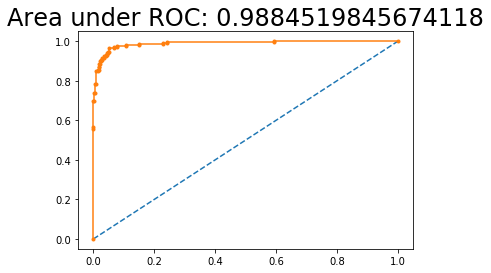

In [32]:
predictions = gnb.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, predictions)
auROC = roc_auc_score(y, predictions)
plt.plot([0,1], [0,1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")

plt.title("Area under ROC: {}".format(auROC), fontdict={"size":24})
plt.show()

# Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc

# Selecting top 10 most important features given by RandomForest Classifier

X, y = X_scaled_robust[["concave points_mean",
                        "concave points_worst",
                        "perimeter_worst",
                        "radius_worst",
                        "area_worst",
                        "texture_worst",
                        "texture_mean",
                        "area_mean",
                        "concavity_mean",
                        "perimeter_mean"]], y_scaled_robust

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

gbm = GradientBoostingClassifier(learning_rate=0.01,
                                 n_estimators=300,
                                 max_depth=3,
                                 min_samples_split=.8,
                                 min_samples_leaf=.40,
                                 max_features=6)

param_dist = {"max_depth": range(1,30,5),
              "max_features": range(1,10,2)}

gbm_cv = RandomizedSearchCV(gbm, param_distributions=param_dist, scoring = "recall", cv = 10)

gbm_cv.fit(X_train, y_train)

y_pred = gbm_cv.predict(X_test)

gbm_cv.score(X_test, y_test)

0.9814814814814815

In [34]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9626508531002913

# XGBoost

In [35]:
from xgboost import XGBClassifier

X, y = X_scaled_robust[["concave points_mean",
                        "concave points_worst",
                        "perimeter_worst",
                        "radius_worst",
                        "area_worst",
                        "texture_worst",
                        "texture_mean",
                        "area_mean",
                        "concavity_mean",
                        "perimeter_mean"]], y_scaled_robust

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
confusion_table = confusion_matrix(y_test, y_pred)

print(confusion_table)
print(classification_report(y_test, y_pred))

print("{:15}: {}".format("Classes", xgb.classes_))

[[86  3]
 [ 3 51]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Classes        : [0 1]


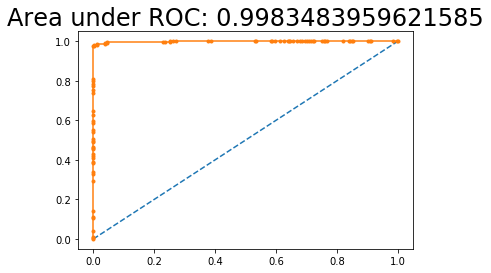

In [36]:
predictions = xgb.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, predictions)
auROC = roc_auc_score(y, predictions)
plt.plot([0,1], [0,1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")

plt.title("Area under ROC: {}".format(auROC), fontdict={"size":24})
plt.show()

# Support Vector Machines with top 10 features given by Random Forest 
### Based on Recall

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

X, y = X_scaled_robust[["concave points_mean",
                        "concave points_worst",
                        "perimeter_worst",
                        "radius_worst",
                        "area_worst",
                        "texture_worst",
                        "texture_mean",
                        "area_mean",
                        "concavity_mean",
                        "perimeter_mean"]], y_scaled_robust

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

svm = SVC(kernel='rbf', gamma=0.1, class_weight={1:2, 0:1}, C=100)  
svm.fit(X_train, y_train) 

y_pred = svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[87  2]
 [ 1 53]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.96      0.98      0.97        54

   micro avg       0.98      0.98      0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



## Kernal Principal Component Analysis with top 10 features given by Random Forest 

In [10]:
from sklearn.decomposition import PCA, KernelPCA

X, y = X_scaled_robust[["concave points_mean",
                        "concave points_worst",
                        "perimeter_worst",
                        "radius_worst",
                        "area_worst",
                        "texture_worst",
                        "texture_mean",
                        "area_mean",
                        "concavity_mean",
                        "perimeter_mean"]], y_scaled_robust

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### With 2 Principal Components

In [11]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA(n_components=2)

X_pca_2 = pca.fit_transform(X_back)

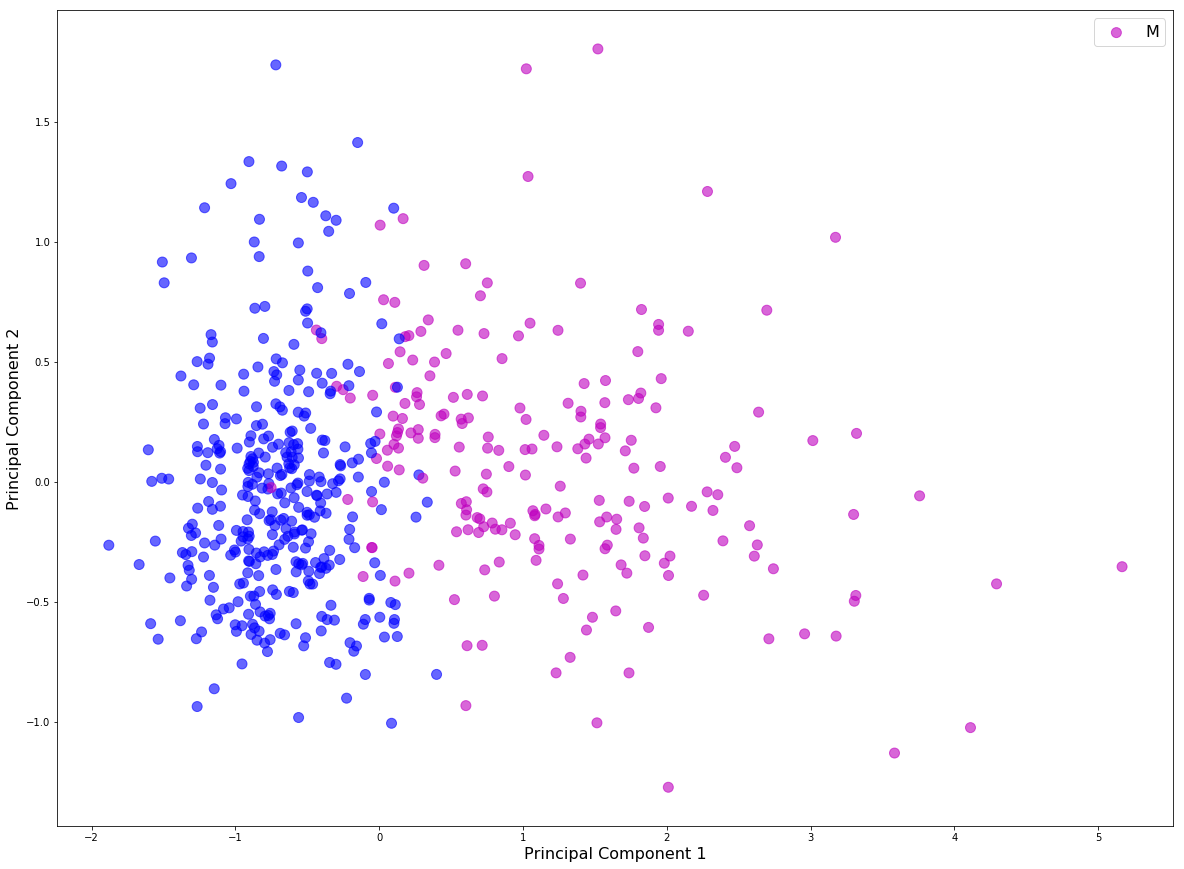

In [12]:
principal_X_pca_2 = pd.DataFrame(data=X_pca_2, columns=['principal component 1', 
                                                        'principal component 2'])

y = y.replace({0:"B", 1:"M"})

plt.rcParams["figure.figsize"] = "20,15"

plt.scatter(principal_X_pca_2.iloc[:,0], principal_X_pca_2.iloc[:,1], c = y, s = 100, alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(y)

# With 3 Principal Components

In [13]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA(n_components=3)

X_pca_3 = pca.fit_transform(X_back)

principal_X_pca_3 = pd.DataFrame(data = X_pca_3, columns=['principal component 1', 
                                                          'principal component 2', 
                                                          'principal component 3'])

<function matplotlib.pyplot.show(*args, **kw)>

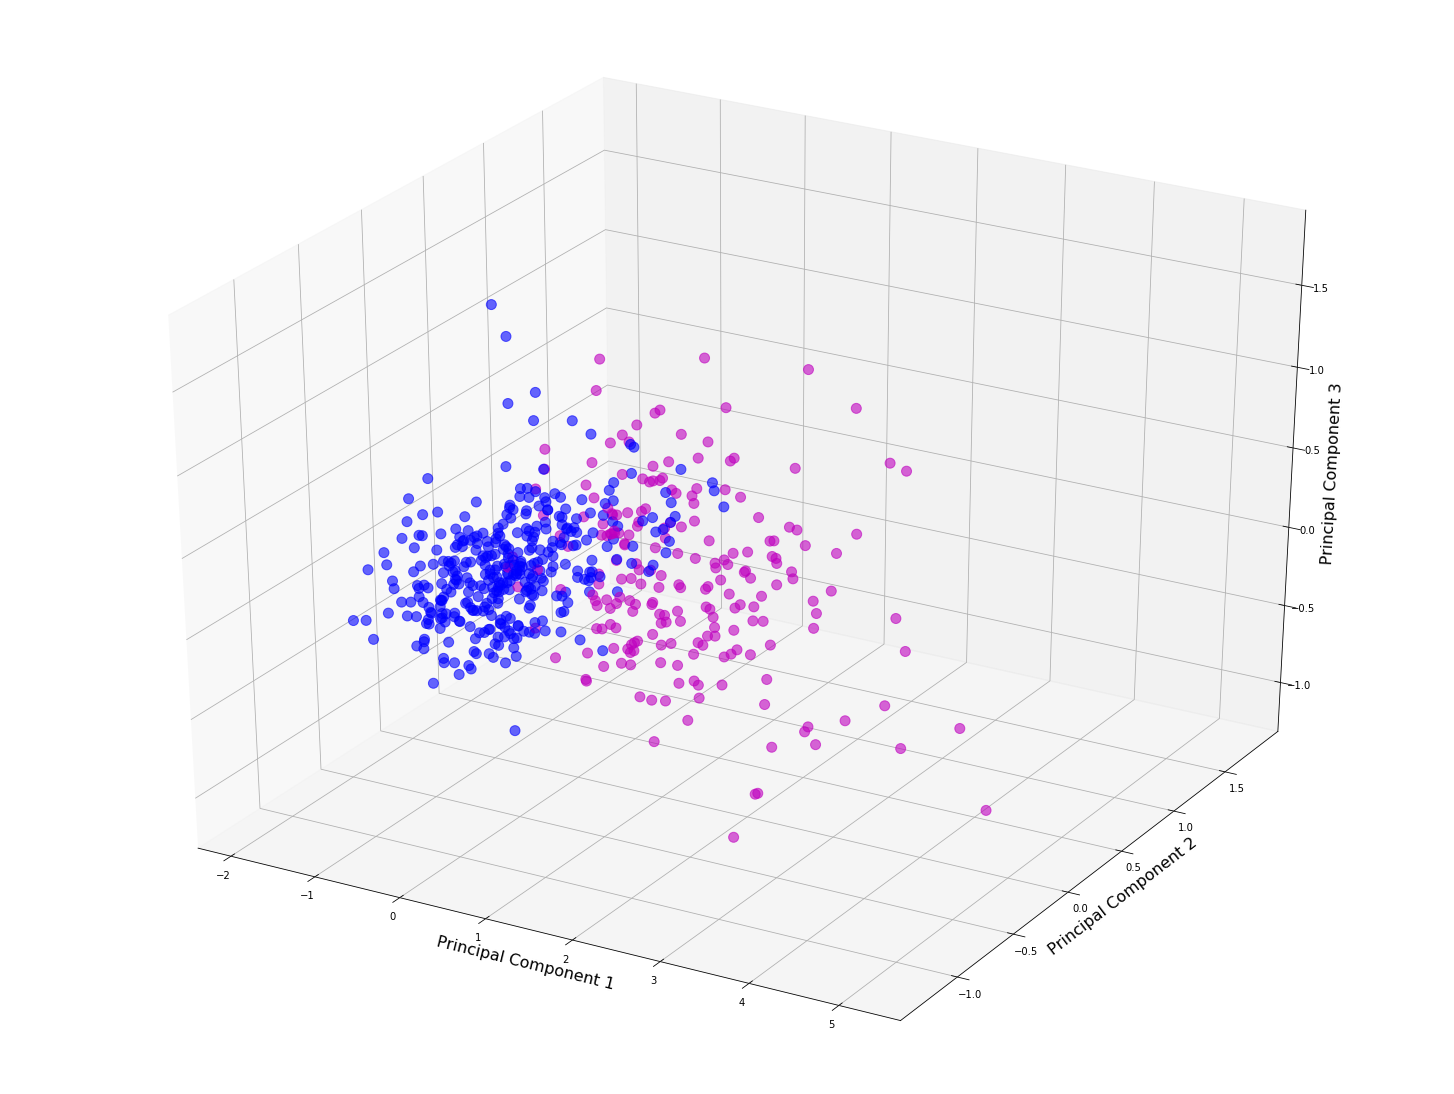

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = "20,15"

fig = plt.figure()
axis = Axes3D(fig)

axis.scatter(principal_X_pca_3.iloc[:,0],
             principal_X_pca_3.iloc[:,1],
             principal_X_pca_3.iloc[:,2], c = y, s = 100, alpha=0.6)

axis.set_xlabel("Principal Component 1")
axis.set_ylabel("Principal Component 2")
axis.set_zlabel("Principal Component 3")
plt.show

## Scree Plot (10 Principal Components)

In [15]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA(n_components=10)

X_pca = pca.fit_transform(X_back)

principal_X_pca = pd.DataFrame(data=X_pca)

Text(0, 0.5, 'Cumulative Proportion of Variance Explained')

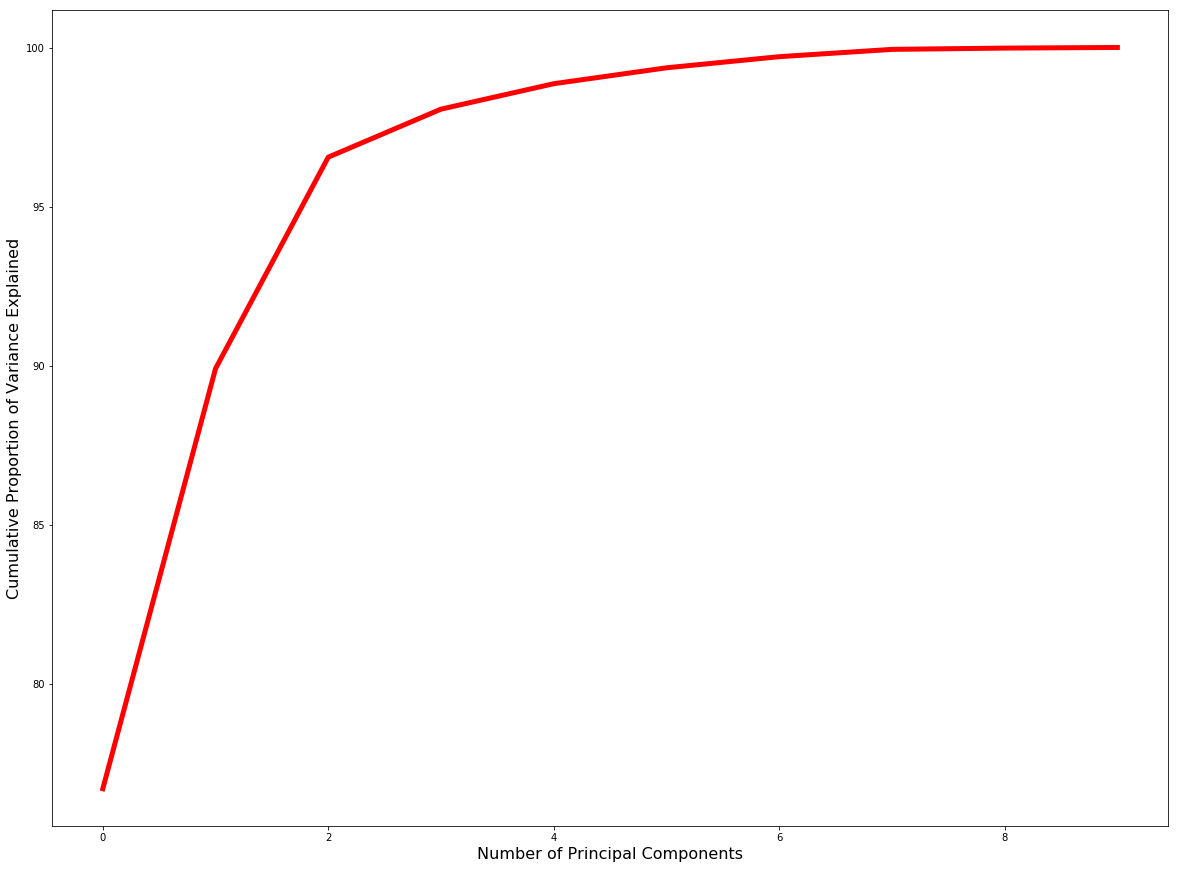

In [16]:
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.rcParams["figure.figsize"] = "20,15"
plt.plot(var1, linewidth=5, c = "red")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Proportion of Variance Explained")

#### From the scree-plot above, we can observe that the 1st principal component explains 90% of the variance, the 2nd principal component explains 7% and the remaining 3% is explained by the rest of the principal components.  From this, we can deduce that the majority of the variance in the data is explained by the first two principal components. We can use logistic regression on these two principal components to create a model and compare its recall score with the other models.  

## Logistic Regression on Principal Component 1

In [1]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA(n_components=1)

X_pca_1 = pca.fit_transform(X_back)

principal_X_pca_1 = pd.DataFrame(data=X_pca_1, columns=['principal component 1'])
principal_X_pca_1

NameError: name 'KernelPCA' is not defined

In [18]:
X, y = principal_X_pca_1, y_scaled_robust

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
classifier = LogisticRegression(solver="newton-cg")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
confusion_table = confusion_matrix(y_test, y_pred)

predictions = classifier.predict_proba(X)[:, 1]
print(confusion_table)
print(classification_report(y_test, y_pred))

print("{:15}: {}".format("Classes", classifier.classes_))
print("{:15}: {}".format("Coefficients", classifier.coef_))
print("{:15}: {}\n".format("Intercept", classifier.intercept_))

[[88  1]
 [ 3 51]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Classes        : [0 1]
Coefficients   : [[4.59087395]]
Intercept      : [-0.33145438]



In [36]:
True_Positive = confusion_table[0][0]

Lg_PC1 = [confusion_table[1][1], confusion_table[0][0],confusion_table[1][0],confusion_table[0][1]]


[51, 88, 3, 1]

## Logistic Regression on Principal Component 1 and Principal Component 2 

In [87]:
X, y = principal_X_pca_2, y_scaled_robust

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

classifier = LogisticRegression(solver="newton-cg")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
confusion_table = confusion_matrix(y_test, y_pred)

predictions = classifier.predict_proba(X)[:, 1]
print(f"OneR using: {column_name}")
print(confusion_table)
print(classification_report(y_test, y_pred))

print("{:15}: {}".format("Classes", classifier.classes_))
print("{:15}: {}".format("Coefficients", classifier.coef_))
print("{:15}: {}\n".format("Intercept", classifier.intercept_))

OneR using: perimeter_mean
[[88  1]
 [ 3 51]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Classes        : [0 1]
Coefficients   : [[4.66532532 1.21822266]]
Intercept      : [-0.4562169]



In [44]:
Lg_PC2 = [confusion_table[1][1], confusion_table[0][0],confusion_table[1][0],confusion_table[0][1]]
methods = ["Lg_pc_1, Lg_pc_2"]
comp_table = pd.DataFrame([Lg_PC1, Lg_PC2], index = ['Lg1', 'Lg2'], columns= ['TP', 'TN','FN','FP'])
comp_table

,TP,TN,FN,FP
Lg1,51,88,3,1
Lg2,51,88,3,1


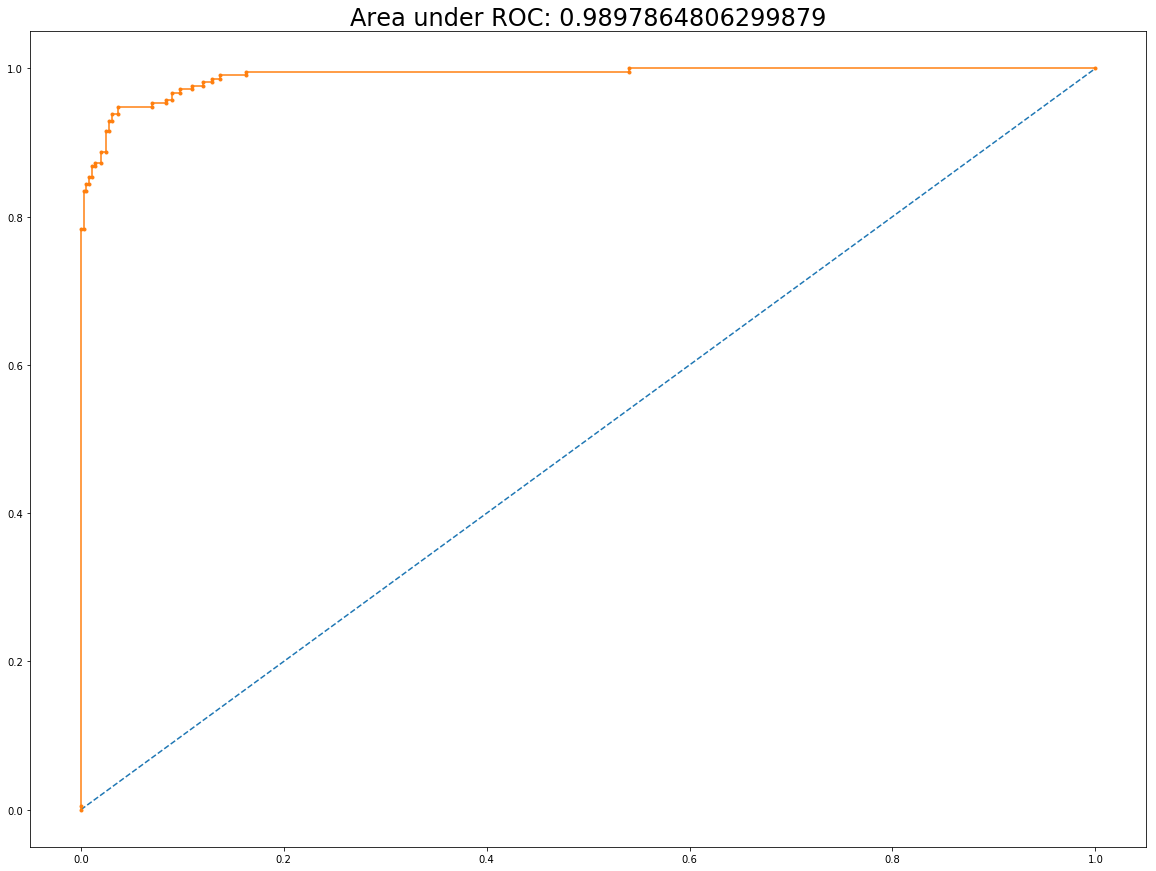

In [88]:
predictions = classifier.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, predictions)
auROC = roc_auc_score(y, predictions)
plt.plot([0,1], [0,1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")

plt.title("Area under ROC: {}".format(auROC), fontdict={"size":24})
plt.show()

#### As observed, the recall score comes out to be 94% which is the same as the logistic regression with 2 features (perimeter_worst, texture_worst).

In [48]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

confusion_table = confusion_matrix(y_test, y_pred)

print(confusion_table)
print(classification_report(y_test, y_pred))

print("{:15}: {}".format("Classes", clf.classes_))

[[82  7]
 [ 2 52]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        89
           1       0.88      0.96      0.92        54

   micro avg       0.94      0.94      0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

Classes        : [0 1]


# Neural Networks with top 10 features given by Random Forest 
### Based on Recall

In [45]:
# Defining a Neural Network, with 10 input nodes and 3 hidden layers of 64 nodes each

def reg_model(learn_rate = 0.1):
    network = keras.models.Sequential()
    layer_1 = Dense(64, input_shape = (10,), activation="tanh")
    layer_2 = Dense(64, activation="tanh")
    layer_3 = Dense(64, activation="tanh")
    layer_4 = Dense(2, activation="softmax")
    network.add(layer_1)
    network.add(Dropout(0.2))
    network.add(layer_2)
    network.add(Dropout(0.2))
    network.add(layer_3)
    network.add(Dropout(0.2))
    network.add(layer_4)
    network.compile(loss = "categorical_crossentropy",
                    optimizer = "adam",
                    metrics = ["accuracy"])
    return network

In [46]:
model = reg_model()

# Printing the model's summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                704       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
Total para

In [47]:
# Splitting the data into training and testing samples

X, y = X_scaled_robust[["concave points_mean",
                        "concave points_worst",
                        "perimeter_worst",
                        "radius_worst",
                        "area_worst",
                        "texture_worst",
                        "texture_mean",
                        "area_mean",
                        "concavity_mean",
                        "perimeter_mean"]], y_scaled_robust
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [51]:
# Running the neural-net with a scikit learn wrapper on it for 2500 epochs and a batch size of 50

classifier = KerasClassifier(reg_model, epochs = 2500, batch_size = 50, verbose = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
confusion_table = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix and the classification report
print(confusion_table)
print(classification_report(y_test, y_pred))

[[86  3]
 [ 0 54]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        89
           1       0.95      1.00      0.97        54

   micro avg       0.98      0.98      0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



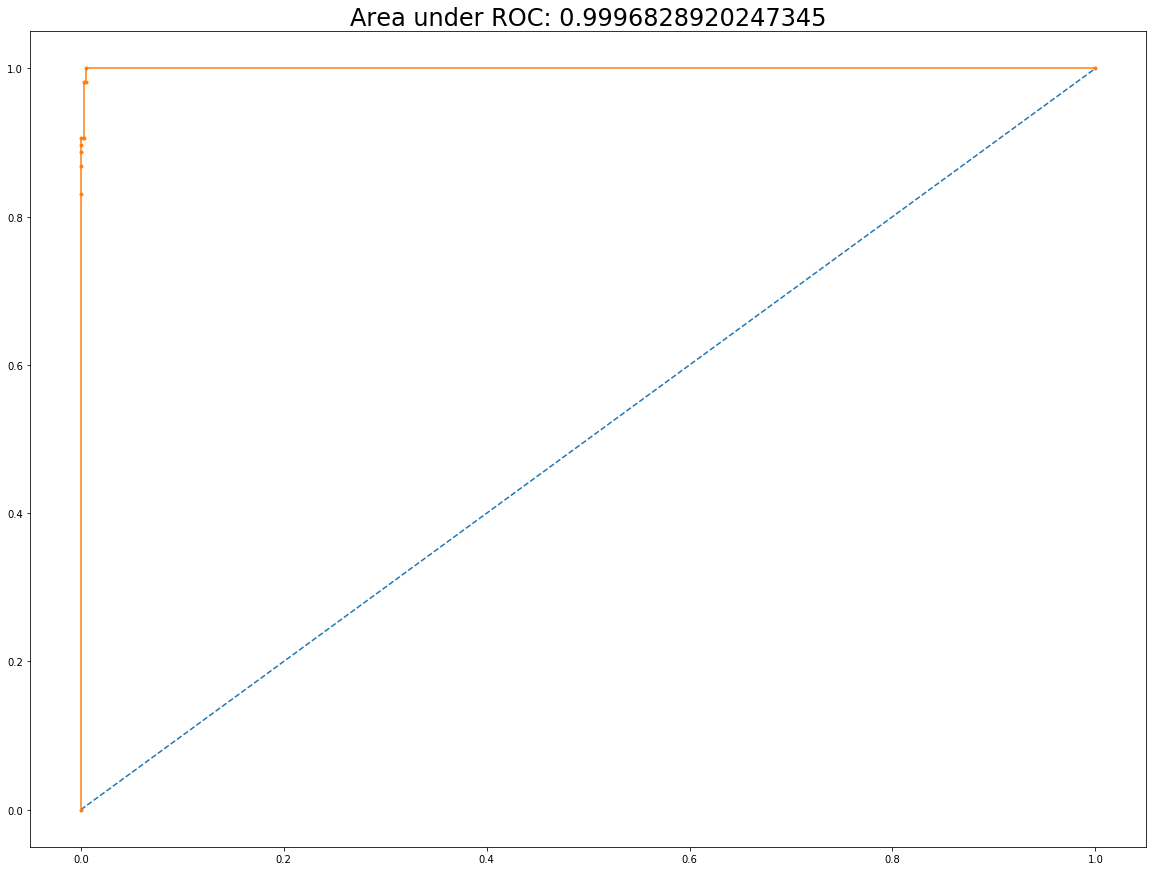

In [52]:
# Plotting the ROC curve 

# Using predict_proba for getting the probability of each prediction

predictions = classifier.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, predictions)
auROC = roc_auc_score(y, predictions)
plt.plot([0,1], [0,1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")

plt.title("Area under ROC: {}".format(auROC), fontdict={"size":24})
plt.show()

#### With a 3 layered neural-net with 64 nodes each, we are able to acheive a perfect recall score of 1.0 ie: 0 false negatives and a couple of false positives. Hence with neural-nets we are able to beat the recall score of all the other machine learning algorithms to predict successfully whether the tumor is malignant or not. Some might argue that for just 4 percent increase in recall is it worth to adopt such a complex model. The answer to that would be: it is totally worth to sacrifice interpretability for complexity in this scenario. Not being able to daignose a malignant tumor would be fatal for a patient, hence it's very important to catch all the false negatives.    